In [4]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

# 적당히 떼서 사용 : train 24000, test 6000
x_train = x_train[:24000]
y_train = y_train[:24000]
x_test = x_test[:6000]
y_test = y_test[:6000]

print('train_data')
print(x_train.shape)
print(y_train.shape)

print('test_data')
print(x_test.shape)
print(y_test.shape)

train_data
(24000, 32, 32, 3)
(24000, 1)
test_data
(6000, 32, 32, 3)
(6000, 1)


In [5]:
# 이미지 리사이징 : (32, 32) -> (224, 224)
import cv2
import numpy as np

x_train_resized = []
for idx in range(len(x_train)):
  print('\r start ', idx+1, '/ ', len(x_train), end='')
  img = x_train[idx]
  img = cv2.resize(img, (224, 224))
  x_train_resized.append(img)
print()

x_test_resized = []
for idx in range(len(x_test)):
  print('\r start ', idx+1, '/ ', len(x_test), end='')
  img = x_test[idx]
  img = cv2.resize(img, (224, 224))
  x_test_resized.append(img)
print()

x_train_resized = np.array(x_train_resized)
x_test_resized = np.array(x_test_resized)
x_train = x_train_resized
x_test = x_test_resized

print(x_train.shape)
print(x_test.shape)

 start  24000 /  24000
 start  6000 /  6000
(24000, 224, 224, 3)
(6000, 224, 224, 3)


In [6]:
from sklearn.model_selection import train_test_split

# Train을 Train, Validation 데이터로 나누기 (섞음)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=123)

print('train data')
print(x_train.shape)
print(y_train.shape)

print('validation data')
print(x_valid.shape)
print(y_valid.shape)

train data
(19200, 224, 224, 3)
(19200, 1)
validation data
(4800, 224, 224, 3)
(4800, 1)


In [7]:
# Scalar 형태의 레이블을 One-hot Encoding 형태로 변환
y_train = tf.squeeze(tf.one_hot(y_train, 100), axis=1)
y_valid = tf.squeeze(tf.one_hot(y_valid, 100), axis=1)
y_test = tf.squeeze(tf.one_hot(y_test, 100), axis=1)

print('train data')
print(x_train.shape)
print(y_train.shape)

print('valid data')
print(x_valid.shape)
print(y_valid.shape)

print('test data')
print(x_test.shape)
print(y_test.shape)

train data
(19200, 224, 224, 3)
(19200, 100)
valid data
(4800, 224, 224, 3)
(4800, 100)
test data
(6000, 224, 224, 3)
(6000, 100)


In [8]:
# 랜덤하게 섞인 데이터셋 수 확인 (Test는 나누지 않았으므로 안섞임)
print('train data')
print(np.sum(y_train, axis=0))
print('validation data')
print(np.sum(y_valid, axis=0))

train data
[177. 191. 182. 189. 195. 195. 169. 184. 216. 191. 195. 188. 173. 164.
 202. 194. 210. 179. 195. 206. 191. 199. 195. 197. 166. 189. 196. 201.
 201. 171. 215. 192. 176. 213. 201. 183. 177. 195. 189. 187. 212. 227.
 187. 188. 199. 198. 183. 201. 185. 192. 192. 189. 183. 196. 179. 187.
 202. 203. 192. 184. 200. 190. 188. 201. 173. 225. 197. 207. 199. 201.
 194. 199. 183. 208. 168. 174. 197. 197. 206. 180. 187. 206. 180. 188.
 191. 196. 192. 198. 179. 208. 182. 195. 186. 190. 200. 179. 183. 187.
 193. 185.]
validation data
[46. 48. 46. 47. 39. 47. 38. 45. 53. 40. 30. 51. 54. 51. 47. 51. 57. 47.
 44. 54. 40. 58. 48. 41. 59. 48. 43. 44. 44. 50. 36. 49. 61. 48. 50. 51.
 60. 39. 58. 50. 53. 42. 50. 58. 37. 32. 57. 42. 48. 54. 40. 56. 40. 38.
 59. 51. 39. 50. 48. 65. 31. 58. 59. 54. 60. 36. 56. 48. 42. 47. 53. 54.
 58. 48. 49. 33. 47. 44. 46. 57. 53. 43. 45. 55. 41. 45. 41. 48. 45. 46.
 67. 46. 33. 44. 48. 55. 40. 57. 39. 58.]


In [11]:
# 모델 설정

base_model = tf.keras.applications.ResNet50(weights='imagenet', input_shape=(224, 224, 3))
base_model = tf.keras.models.Model(base_model.inputs, base_model.layers[-2].output)   # Output : 끝에서 2번째 까지 ~ FC Layer 출력 변경위함

# Imagenet 으로 이미 학습함, 추가학습 X
base_model.trainable = False

# 마지막 Fully Connected Layer 수정 : 출력 100개로 변경
# 이 Layer만 학습하게 됨
x = base_model.output
pred = tf.keras.layers.Dense(100, activation='softmax')(x)  
model = tf.keras.models.Model(inputs=base_model.input, outputs=pred)

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])

model.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [13]:
# 학습
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=25, validation_data=(x_valid, y_valid))

Epoch 1/25
600/600 [==============================] - 42s 70ms/step - loss: 2.8893 - acc: 0.3224 - val_loss: 2.4189 - val_acc: 0.4069
Epoch 2/25
600/600 [==============================] - 41s 68ms/step - loss: 2.0636 - acc: 0.4971 - val_loss: 2.0282 - val_acc: 0.4821
Epoch 3/25
600/600 [==============================] - 41s 68ms/step - loss: 1.7315 - acc: 0.5695 - val_loss: 1.8315 - val_acc: 0.5227
Epoch 4/25
600/600 [==============================] - 41s 68ms/step - loss: 1.5357 - acc: 0.6092 - val_loss: 1.7231 - val_acc: 0.5350
Epoch 5/25
600/600 [==============================] - 41s 68ms/step - loss: 1.4016 - acc: 0.6402 - val_loss: 1.6416 - val_acc: 0.5525
Epoch 6/25
600/600 [==============================] - 41s 68ms/step - loss: 1.2976 - acc: 0.6633 - val_loss: 1.5896 - val_acc: 0.5633
Epoch 7/25
600/600 [==============================] - 41s 68ms/step - loss: 1.2116 - acc: 0.6866 - val_loss: 1.5439 - val_acc: 0.5731
Epoch 8/25
600/600 [==============================] - 41s 68ms

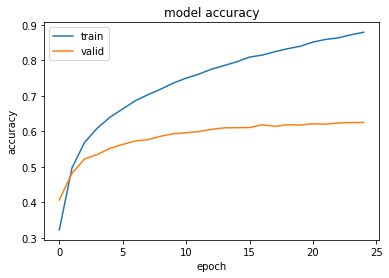

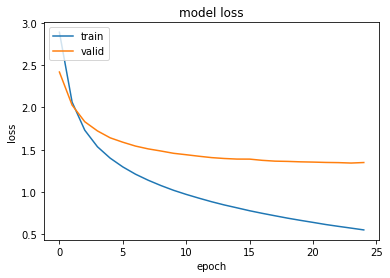

In [14]:
# Accuracy, Loss 그래프 출력
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [15]:
# Validation 정확도
print('validation accuracy')
print(history.history['val_acc'][-1])
print(np.max(history.history['val_acc']))

validation accuracy
0.6254166960716248
0.6254166960716248


In [16]:
# Test 정확도
results = model.evaluate(x_test, y_test, batch_size=32)

print('test accuracy')
print(results[1])

188/188 [==============================] - 11s 57ms/step - loss: 1.3505 - acc: 0.6283
test accuracy
0.628333330154419
